# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [17]:
import numpy as np
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
#X, y = mnist['data'], mnist['target']

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist['data']
y = mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [20]:
#70000 rows and 784 columns or values
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [21]:
y[35999]

'0'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

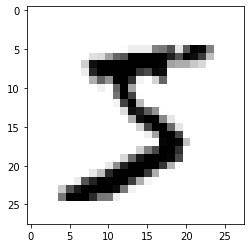

In [22]:
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(X[0,:].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

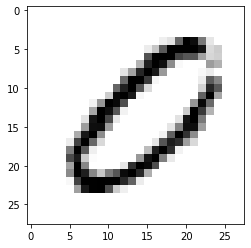

In [23]:
plt.imshow(X[35999].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [24]:
#y value what it should be and x value is the image
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.model_selection import train_test_split

X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [25]:
#use X_train and X_test

y5=np.where(y=='5', 1, 0)
y5_train = y5[:60000]
y5_test = y5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [26]:
from sklearn.linear_model import LogisticRegression

fives_model = LogisticRegression(max_iter=10000).fit(X_train, y5_train)

/Users/Veeka/.pyenv/versions/3.7.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Does the classifier predict correctly the 36000th digit we picked before?

In [27]:
#The classifier did not correctly predicted the 36000th digit (which is '0')
pred = fives_model.predict(X)
print(pred[35999])

actual_num = y[35999]
actual_num

0


'0'

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [50]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [51]:
never_5_clf.fit(X_train, y5_train)
never_5_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#logistic regression score
score = fives_model.score(X_train, y5_train)
score

0.9783333333333334

In [53]:
#predict using test data
from sklearn import metrics
predictions = fives_model.predict(X_test)

#confusion matrix is computed to evaluate the accuracy of a classification.
conf_matrix = metrics.confusion_matrix(y_true=y5_test, y_pred=predictions, labels=fives_model.classes_)
conf_matrix

array([[9026,   82],
       [ 145,  747]])

In [43]:
#ratio: tp / (tp + fp), precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
precision = precision_score(y_true=y5_test, y_pred=predictions)
precision

0.9010856453558505

In [44]:
#ratio: tp / (tp + fn), recall is intuitively the ability of the classifier to find all the positive samples.
recall = recall_score(y_true=y5_test, y_pred=predictions)
recall

0.8374439461883408

In [45]:
#balanced F-score or F-measure, F1 score can be interpreted as a weighted average of the precision and recall.
f1_score = f1_score(y_true=y5_test, y_pred=predictions)
f1_score

0.8680999418942476

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

/Users/Veeka/.pyenv/versions/3.7.7/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


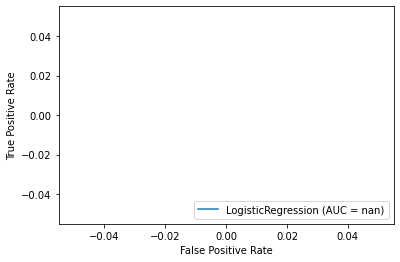

In [60]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

#ROC - receiver operating characteristic, the function did not give the results I wanted -- I am doing something wrong
plot_roc_curve(fives_model, X_test, y_test)


In [61]:
predictions = fives_model.predict(X_test)
fpr, tpr, threshold = roc_curve(y5_test, y_pred_never5)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'y_pred_never5' is not defined

### Now find the roc_auc_score for each. 

In [ ]:
#I don't know what to add for y_score
roc_score = roc_auc_score(y_true=y_test, y_score=???)
roc_score

### What does this metric tell you? Which classifier works better with this metric in mind?